<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 2)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-03-14T21:00:00 2019-03-16T21:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-24 23:58:14 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...
Prec MIN 1.8626451e-06 Prec MAX 32.21693
<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 2)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2019-04-21 2019-04-25T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-06-24 

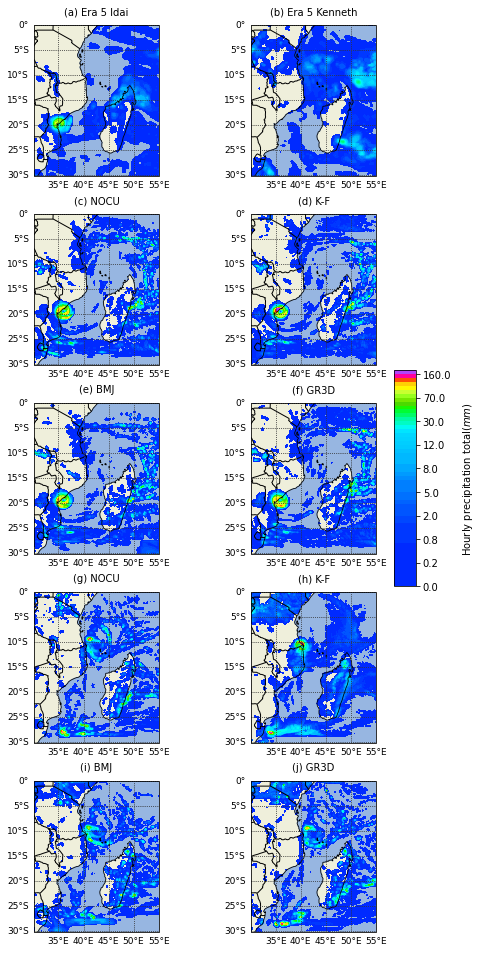

In [16]:
#!/usr/bin/env python
# coding: utf-8
#https://pratiman-91.github.io/2020/07/29/WRF-Surface-plot-using-Python.html
# Import the tools needed :
# 
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
from matplotlib.colors import from_levels_and_colors, LinearSegmentedColormap
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projecations list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, GeoBounds, get_cartopy, cartopy_xlim
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import cartopy.feature as cfe
import matplotlib.colors as colors
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

scheme_name=["(a) Era 5 Idai","(b) Era 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]

###ERA 5
# https://fabienmaussion.info/climate_system/week_04/01_Lesson_Wind-Derivatives-Integrals.html
# https://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week8/05_Xarray_TimeSeries.html?highlight=slp
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\Era_wrf_data\Kenneth" Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data='/mnt/g/WRF_Schemes/Era_wrf_data/Era/'   #IAP
#"G:\WRF_Schemes\Era_wrf_data\Era\UV10_mslp_01.nc"
#
#fig=plt.figure(figsize=(18,15),constrained_layout=True)#, dpi=200)
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig.subplots_adjust(wspace=.35)
#fig.tight_layout()
for imonth in np.arange(1,3):  # loop over 2 events 
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fic=rep_data+'ERA_tot_precip_'+'{:02d}'.format(imonth)+'.nc'
    ds=xr.open_dataset(fic)
    #ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
    many_times=np.array(['2019-03-14T21:00:00','2019-04-25T12:00:00'],dtype=np.datetime64) # 3hr to LF
    ds =ds.sel(time=many_times, method='nearest')#.mean('time')
    #print(ds)
    #Read variables
    tpp=ds.variables['tp'][:]*1000 #convert to mm from kg/ms-1
    lons=ds.variables['longitude'][:].squeeze()
    lats=ds.variables['latitude'][:].squeeze()
    print(ds)  
    #print (lons.shape)
    #print (lats.shape)
    #print (tpp.shape)
    print("Prec MIN", np.nanmin(tpp), "Prec MAX", np.nanmax(tpp))
    ###########
    # Making precipitation levels using several groupings of evenly spaced levels
    # (Taken from www.twisterdata.com).
    precip_levels = np.append(np.arange(.01, .05, .02), np.arange(.05, .30, .05))
    precip_levels = np.append(precip_levels, np.arange(.30, 1.0, .1))
    precip_levels = np.append(precip_levels, np.arange(1.0, 2.0, .25))
    precip_levels = np.append(precip_levels, np.arange(2.0, 5.0, .5))
    precip_levels = np.append(precip_levels, np.arange(5.0, 10.0, .5))
    precip_levels = np.append(precip_levels, np.arange(10.0, 15.0, 1.0))
    precip_levels = np.append(precip_levels, np.arange(15.0, 50.0, 5.0))
    #precip_levels = np.append(precip_levels, np.arange(50.0, 100.0, 10.0))
    #precip_levels = np.append(precip_levels, np.arange(100.0, 200.0, 20.0))

    # Here is how you can truncate an existing colormap in to a subset of it.
    orig_cmap = get_cmap("gist_ncar")
    cmap_PR = LinearSegmentedColormap.from_list("gist_ncar_trunc", 
                                             orig_cmap(np.linspace(.12, .9, 256))) 

    # Define contour levels
    #clev_PR      = [0.0, 2.0, 4.0, 6., 8.0, 10.0, 15., 20., 30.0]
    #clev_PR = np.arange(0, 100, 10) #in mm
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500,600,700,800,900,1000]
    #norm_PR      = colors.BoundaryNorm(boundaries=clev_PR, ncolors=256)
    #cmap_PR      = plt.cm.Blues
    #levels = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    # Make the contour lines and fill them.
    #contours=pyplot.contour(to_np(lons), to_np(lats), 
     #              to_np(rain_tot), levels=levels, colors="black",
    #               transform=crs.PlateCarree())
    
    #plt.clabel(contours, inline=1, fontsize=5, fmt="%i")
    contourf=plt.contourf(lons, lats, 
                tpp[0], levels=precip_levels,  
                transform=crs.PlateCarree(),
                cmap=cmap_PR ) #cmap=pyplot.cm.viridis) cmap=get_cmap("jet")) #PuOr
    # Add the gridlines
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 


    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    #plt.subplots_adjust(top=0.92, bottom=0.08, left=0.250, right=0.53, hspace=0.25,
    #                wspace=0.35)
    plt.title(scheme_name[imonth-1],fontsize=10)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.250, right=0.53, hspace=0.25,
                    wspace=0.35)


##############################Idai     
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Idai/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data= '/mnt/g/WRF_Schemes/Era_wrf_data/Kenneth/' #IAP
#"G:\WRF_Schemes\Era_wrf_data\Idai\wrfout_d01_03.nc"
#fig3=plt.figure(figsize=(18,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig3.subplots_adjust(hspace=0.3, wspace=.0005)
#fig.tight_layout()
#fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
for imonth in np.arange(3, 7):  # loop over 12 months
    #fig=plt.figure(figsize=(12,10))
    #ax1.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    #fig3=plt.figure(figsize=(18,15))#,
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fnc=rep_data+'wrfout_d01_'+'{:02d}'.format(imonth)+'.nc'
    ncfile=Dataset(fnc) #          
    
    # Get precipitable water in kg/m2 [or mm]
    rainc = getvar(ncfile, "RAINC", timeidx=31, method="cat") 
    rainc1 = getvar(ncfile, "RAINC", timeidx=32, method="cat") #2019-03-14T21:00:00 -3hr
    rainnc = getvar(ncfile, "RAINNC", timeidx=31, method="cat")
    rainnc1 = getvar(ncfile, "RAINNC", timeidx=32, method="cat")

    # Get the Precipitable Water in inches 
    # [Note: 1 kg/m2 = 1 mm = .0393701 in]
    #rainc1 = rainc * .0393701
    #rainnc2 = rainnc * .0393701
    rain_tot = (rainc1-rainc) + (rainnc1 - rainnc) 

    #print(rain_tot)
    print("Prec tot MIN", np.nanmin(rain_tot), "Prec tot MAX", np.nanmax(rain_tot))
    
    #print("Prec rc MIN", np.nanmin(rainc1), "Prec rc MAX", np.nanmax(rainc1))
   # print("Prec rnc MIN", np.nanmin(rainnc1), "Prec rnc MAX", np.nanmax(rainnc1))

    # After a math operation, xarray drops the attributes, so 
    # let's add them back and set the units to be inches
    #pw_in.attrs.update(pw.attrs)
    #pw_in.attrs["units"] = "in"
    #pw_in.attrs["units"] = "in"


    #ax=fig.add_subplot(5,2, 3, projection=crs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    #ax.set_extent([30.1,55.1,-30.1, 0.1], crs=crs.PlateCarree())

    # Get the cartopy object and the lat,lon coords
    cart_proj = get_cartopy(rainc)
    lats, lons = wrf.latlon_coords(rainc)

    # Create a figure and get the GetAxes object
    #fig = pyplot.figure(figsize=(9, 10))
    #geo_axes = pyplot.axes(projection=cart_proj)

    # Download and add the states
    # See the cartopy documentation for more on this
    #states = NaturalEarthFeature(category='cultural', 
    #                             scale='50m', 
    #                             facecolor='none',
    #                             name='admin_1_states_provinces_shp')
    #geo_axes.add_feature(states, linewidth=2.0, edgecolor='black', zorder=2)

    # Set the contour levels so that all plots match
    #levels = np.arange(0, 1.4, .2) #in inches
    # Define contour levels
    #clev_PR      = [0.0, 2.0, 4.0, 6., 8.0, 10.0, 15., 20., 30.0]
    ##clev_PR = np.arange(0, 100, 10) #in mm
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500,600,700,800,900,1000]
    ##norm_PR      = colors.BoundaryNorm(boundaries=clev_PR, ncolors=256)
    ##cmap_PR      = plt.cm.Blues
     
       # Making precipitation levels using several groupings of evenly spaced levels
    # (Taken from www.twisterdata.com).
    precip_levels = np.append(np.arange(.01, .05, .02), np.arange(.05, .30, .05))
    precip_levels = np.append(precip_levels, np.arange(.30, 1.0, .1))
    precip_levels = np.append(precip_levels, np.arange(1.0, 2.0, .25))
    precip_levels = np.append(precip_levels, np.arange(2.0, 5.0, .5))
    precip_levels = np.append(precip_levels, np.arange(5.0, 10.0, .5))
    precip_levels = np.append(precip_levels, np.arange(10.0, 15.0, 1.0))
    precip_levels = np.append(precip_levels, np.arange(15.0, 50.0, 5.0))
    precip_levels = np.append(precip_levels, np.arange(50.0, 100.0, 10.0))
    precip_levels = np.append(precip_levels, np.arange(100.0, 140.0, 20.0))


    # Here is how you can truncate an existing colormap in to a subset of it.
    orig_cmap = get_cmap("gist_ncar")
    cmap_PR = LinearSegmentedColormap.from_list("gist_ncar_trunc", 
                                             orig_cmap(np.linspace(.12, .9, 256))) 

    
    
    
    #levels = np.arange(0, 750, 50) #in mm
    #levels = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    # Make the contour lines and fill them.
    #pyplot.contour(to_np(lons), to_np(lats), 
    #               to_np(pw_in), levels=levels, colors="black",
    #               transform=crs.PlateCarree())
    contourf=plt.contourf(to_np(lons), to_np(lats), 
                to_np(rain_tot), levels=precip_levels,  
                transform=crs.PlateCarree(),
                cmap=cmap_PR ) #cmap=pyplot.cm.viridis) cmap=get_cmap("jet"))
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 


    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    #plt.subplots_adjust(top=0.92, bottom=0.08, left=0.250, right=0.53, hspace=0.25,
    #                wspace=0.35)
    plt.title(scheme_name[imonth-1],fontsize=10)
    
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.250, right=0.53, hspace=0.25,
                    wspace=0.35)
    
##############################Kenneth      
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Kenneth/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data= '/mnt/g/WRF_Schemes/Era_wrf_data/Kenneth/' #IAP
#"G:\WRF_Schemes\Era_wrf_data\Idai\wrfout_d01_03.nc"
#fig3=plt.figure(figsize=(18,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig3.subplots_adjust(hspace=0.3, wspace=.0005)
#fig.tight_layout()
#fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
for imonth in np.arange(7,11):  # loop over 12 months
    #fig=plt.figure(figsize=(12,10))
    #ax1.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    #fig3=plt.figure(figsize=(18,15))#,
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fnc=rep_data+'wrfout_d01_'+'{:02d}'.format(imonth)+'.nc'
    ncfile=Dataset(fnc) #          
    
    # Get precipitable water in kg/m2 [or mm]
    rainck = getvar(ncfile, "RAINC", timeidx=36, method="cat")
    rainck1 = getvar(ncfile, "RAINC", timeidx=37, method="cat") #2019-04-25T12:00:00 -3hr
    rainnck = getvar(ncfile, "RAINNC", timeidx=36, method="cat")
    rainnck1 = getvar(ncfile, "RAINNC", timeidx=37, method="cat")
    

    # Get the Precipitable Water in inches 
    # [Note: 1 kg/m2 = 1 mm = .0393701 in]
    #rainc1 = rainc * .0393701
    #rainnc2 = rainnc * .0393701
    
    rain_totk = (rainck1-rainck) + (rainnck1-rainnck) 

    #print(rain_totk)
    print("Prec  tot MIN", np.nanmin(rain_totk), "Prec tot MAX", np.nanmax(rain_totk))

    # After a math operation, xarray drops the attributes, so 
    # let's add them back and set the units to be inches
    #pw_in.attrs.update(pw.attrs)
    #pw_in.attrs["units"] = "in"
    #pw_in.attrs["units"] = "in"


    #ax=fig.add_subplot(5,2, 3, projection=crs.PlateCarree()) #ccrs.LambertConformal()) #LambertConformal())   
    #ax.set_extent([30.1,55.1,-30.1, 0.1], crs=crs.PlateCarree())

    # Get the cartopy object and the lat,lon coords
    cart_proj = get_cartopy(rainck)
    lats, lons = wrf.latlon_coords(rainck)

    # Create a figure and get the GetAxes object
    #fig = pyplot.figure(figsize=(9, 10))
    #geo_axes = pyplot.axes(projection=cart_proj)

    # Download and add the states
    # See the cartopy documentation for more on this
    #states = NaturalEarthFeature(category='cultural', 
    #                             scale='50m', 
    #                             facecolor='none',
    #                             name='admin_1_states_provinces_shp')
    #geo_axes.add_feature(states, linewidth=2.0, edgecolor='black', zorder=2)

    # Set the contour levels so that all plots match
    #levels = np.arange(0, 1.4, .2) #in inches
    ##levels = np.arange(0, 750, 50) #in mm
 

   # Making precipitation levels using several groupings of evenly spaced levels
    # (Taken from www.twisterdata.com).
    precip_levels = np.append(np.arange(.01, .05, .02), np.arange(.05, .30, .05))
    precip_levels = np.append(precip_levels, np.arange(.30, 1.0, .1))
    precip_levels = np.append(precip_levels, np.arange(1.0, 2.0, .25))
    precip_levels = np.append(precip_levels, np.arange(2.0, 5.0, .5))
    precip_levels = np.append(precip_levels, np.arange(5.0, 10.0, .5))
    precip_levels = np.append(precip_levels, np.arange(10.0, 15.0, 1.0))
    precip_levels = np.append(precip_levels, np.arange(15.0, 50.0, 5.0))
    precip_levels = np.append(precip_levels, np.arange(50.0, 100.0, 10.0))
    precip_levels = np.append(precip_levels, np.arange(100.0, 200.0, 20.0))

    # Here is how you can truncate an existing colormap in to a subset of it.
    orig_cmap = get_cmap("gist_ncar")
    cmap_PR = LinearSegmentedColormap.from_list("gist_ncar_trunc", 
                                             orig_cmap(np.linspace(.12, .9, 256))) 

    # Define contour levels
    #clev_PR      = [0.0, 2.0, 4.0, 6., 8.0, 10.0, 15., 20., 30.0]
    #clev_PR = np.arange(0, 100, 10) #in mm
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500,600,700,800,900,1000]
    #norm_PR      = colors.BoundaryNorm(boundaries=clev_PR, ncolors=256)
    #cmap_PR      = plt.cm.Blues
    #levels = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    # Make the contour lines and fill them.
    #contours=pyplot.contour(to_np(lons), to_np(lats), 
     #              to_np(rain_tot), levels=levels, colors="black",
    #               transform=crs.PlateCarree())
    
    #plt.clabel(contours, inline=1, fontsize=5, fmt="%i")
    contourf=plt.contourf(to_np(lons), to_np(lats), 
                to_np(rain_totk), levels=precip_levels,  
                transform=crs.PlateCarree(),
                cmap=cmap_PR ) #cmap=pyplot.cm.viridis) cmap=get_cmap("jet")) #PuOr
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 

    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.250, right=0.53, hspace=0.25,
                    wspace=0.35)    
    
    
# Add colorbar
#cbarD = plt.colorbar(mm, spacing='proportional', ticks=clevs, boundaries=clevs, pad="2%")
##mfc_level=np.arange(-0.08,0.1,0.02)
# Add colorbar
#cbarD = m.colorbar(plotPR1, spacing='proportional', ticks=clev_PR, boundaries=clev_PR, pad="2%")

fig.subplots_adjust(right=0.6)
#cbar_ax = fig.add_axes([0.65, 0.15, 0.02, 0.7])
cbar_ax = fig.add_axes([0.6, 0.40, 0.02, 0.2])
#fig.colorbar(pc, cax=cbar_ax, label='Hourly rainfall sum in mm');



#cbarD = m.colorbar(plotPR1, spacing='proportional', ticks=clev_PR, boundaries=clev_PR, pad="2%")
#cbar_ax = fig.add_axes([0.55, 0.40, 0.01, 0.2])
cbar = plt.colorbar(contourf, cax=cbar_ax, shrink=.42, extend='max')

#cbar = contourf.colorbar(contourf, spacing='proportional', ticks=clev_PR, boundaries=clev_PR, pad="2%")
#cbar=fig.colorbar(strm.lines, cax=cbar_ax,orientation='vertical', shrink=1.25, extend='max')
#cbar.set_label('$ ms^{-1}$',size=12,rotation=90,labelpad=15) #, rotation=90, fontsize=10)
cbar.set_label('Hourly precipitation total($mm$)', rotation=90,labelpad=10, fontsize=10)
#cbar.set_clim(0,50)
#cbar.ax.tick_params(labelsize=10) 
#cbar.ax.yaxis.get_offset_text().set(size=10) 


#save figures    
rep_data1='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Plots/' 
year='2019'
#plt.tight_layout(pad=4.5, h_pad=1.0, w_pad=1.0)        # To adjust spacing between subplots and inside the figure
plt.savefig(rep_data1+'Idai_Ken_RR_PRECIP_'+year+'.png', bbox_inches='tight',dpi=200) #'monmean_SRF.'+year+month+'.
plt.savefig(rep_data1+'Idai_Ken_RR_PRECIP_'+year+'.pdf', bbox_inches='tight',dpi=200)
plt.show() 
    


In [ ]:
import xarray as xr
hourly_precipitation = xr.open_dataset('/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/ERA_tot_precip_02.nc')
tpp = hourly_precipitation['tp']
daily_precipitation = tpp.resample(time='H', closed='right').sum(dim='time')*1000
print(daily_precipitation)
print("Prec MIN", np.nanmin(daily_precipitation), "Prec MAX", np.nanmax(daily_precipitation))

In [ ]:
#!/usr/bin/env python
# coding: utf-8
# Import the tools needed :
# 
from netCDF4 import Dataset
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import datetime #date time slicing/indexing
from netCDF4 import Dataset
import wrf
from cartopy.feature import NaturalEarthFeature
from wrf import to_np, getvar, smooth2d, GeoBounds, get_cartopy, cartopy_xlim
import xarray as xr
import numpy as np
import cartopy.crs as crs
import matplotlib
from matplotlib.cm import get_cmap
from matplotlib.colors import from_levels_and_colors, LinearSegmentedColormap
import matplotlib.pyplot as plt
import cartopy.feature as cfe

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

scheme_name=["(a) Era 5 Idai","(b) Era 5 Kenneth","(c) NOCU","(d) K-F","(e) BMJ","(f) GR3D",\
             "(g) NOCU","(h) K-F","(i) BMJ","(j) GR3D"]
###ERA 5
# https://fabienmaussion.info/climate_system/week_04/01_Lesson_Wind-Derivatives-Integrals.html
# https://www.atmos.albany.edu/facstaff/ktyle/atm533/core/week8/05_Xarray_TimeSeries.html?highlight=slp
rep_data='/mnt/g/ERA_5_wspd_slp/wrf_schemes_d01/Era_wrf_data/Era/' #Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\Era_wrf_data\Kenneth" Home
#"G:\ERA_5_wspd_slp\wrf_schemes_d01\idai\wrfout_d01_01.nc"
#rep_data='/mnt/g/WRF_Schemes/Era_wrf_data/Era/'   #IAP
#"G:\WRF_Schemes\Era_wrf_data\Era\UV10_mslp_01.nc"
#
#fig=plt.figure(figsize=(18,15),constrained_layout=True)#, dpi=200)
fig=plt.figure(figsize=(15,15))#, dpi=200)#, ) #, constrained_layout=True)
#fig.subplots_adjust(wspace=.35)
#fig.tight_layout()
for imonth in np.arange(1,3):  # loop over 2 events 
    ax=fig.add_subplot(5,2,imonth, projection=ccrs.PlateCarree())   
    ax.set_extent([30.1,55.1,-30.1, 0.1], crs=ccrs.PlateCarree())
    fic=rep_data+'ERA_tot_precip_'+'{:02d}'.format(imonth)+'.nc'
    ds=xr.open_dataset(fic)
    #ds = ds.sel(time=slice('2019-4-25')).load() #,'2019-4-25'))
    many_times=np.array(['2019-03-14T21:00:00','2019-04-25T12:00:00'],dtype=np.datetime64) # 3hr to LF
    ds =ds.sel(time=many_times, method='nearest')#.mean('time')
    #print(ds)
    #Read variables
    tpp=ds.variables['tp'][:]*1000 #convert to mm from kg/ms-1
    lons=ds.variables['longitude'][:].squeeze()
    lats=ds.variables['latitude'][:].squeeze()
    print(ds)  
    #print (lons.shape)
    #print (lats.shape)
    #print (tpp.shape)
    
    print("Prec MIN", np.nanmin(tpp), "Prec MAX", np.nanmax(tpp))
    ###########
    # Making precipitation levels using several groupings of evenly spaced levels
    # (Taken from www.twisterdata.com).
    precip_levels = np.append(np.arange(.01, .05, .02), np.arange(.05, .30, .05))
    precip_levels = np.append(precip_levels, np.arange(.30, 1.0, .1))
    precip_levels = np.append(precip_levels, np.arange(1.0, 2.0, .25))
    precip_levels = np.append(precip_levels, np.arange(2.0, 5.0, .5))
    precip_levels = np.append(precip_levels, np.arange(5.0, 10.0, .5))
    precip_levels = np.append(precip_levels, np.arange(10.0, 15.0, 1.0))
    precip_levels = np.append(precip_levels, np.arange(15.0, 50.0, 5.0))
    #precip_levels = np.append(precip_levels, np.arange(50.0, 100.0, 10.0))
    #precip_levels = np.append(precip_levels, np.arange(100.0, 200.0, 20.0))

    # Here is how you can truncate an existing colormap in to a subset of it.
    orig_cmap = get_cmap("gist_ncar")
    cmap_PR = LinearSegmentedColormap.from_list("gist_ncar_trunc", 
                                             orig_cmap(np.linspace(.12, .9, 256))) 

    # Define contour levels
    #clev_PR      = [0.0, 2.0, 4.0, 6., 8.0, 10.0, 15., 20., 30.0]
    #clev_PR = np.arange(0, 100, 10) #in mm
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    #clev_PR = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500,600,700,800,900,1000]
    #norm_PR      = colors.BoundaryNorm(boundaries=clev_PR, ncolors=256)
    #cmap_PR      = plt.cm.Blues
    #levels = [0.1,0.5,1,2,5,10,15,20,30,40,50,80,100,200,300,500]
    # Make the contour lines and fill them.
    #contours=pyplot.contour(to_np(lons), to_np(lats), 
     #              to_np(rain_tot), levels=levels, colors="black",
    #               transform=crs.PlateCarree())
    
    #plt.clabel(contours, inline=1, fontsize=5, fmt="%i")
    contourf=plt.contourf(lons, lats, 
                tpp[0], levels=precip_levels,  
                transform=crs.PlateCarree(),
                cmap=cmap_PR ) #cmap=pyplot.cm.viridis) cmap=get_cmap("jet")) #PuOr
    # Add the gridlines
    ax.gridlines(color="black", linestyle="dotted")

    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.BORDERS)
    ax.coastlines('50m', linewidth=0.8) 

    #Add labels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, color='gray', alpha=0.5, linestyle=':')
    gl.top_labels = False
    gl.right_labels = False
    #Label style 
    gl.xlabel_style = {'size': 9}
    gl.ylabel_style = {'size': 9}
    
    plt.title(scheme_name[imonth-1],fontsize=10)

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.250, right=0.53, hspace=0.25,
                    wspace=0.35)    